https://www.astroexplorer.org/details/ajac8154f13

In [1]:
import sys
sys.path.insert(0, '../code/')
from catalog import get_nexsci_data

df = get_nexsci_data(table_name="ps", clobber=False)
df.head()

Column definitions:  https://exoplanetarchive.ipac.caltech.edu/docs/API_PS_columns.html


/mnt_ut3/raid_ut3/home/jerome/github/research/project/wakai/notebooks/../code/catalog.py:273: DtypeWarning: Columns (3,4,35,40,45,50,55,60,65,75,123,139,148,153,162,167,183,206,211,216,221,226,231,232,237,242,257,262,267) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fp)


Loaded:  ../data/nexsci_ps.csv


,pl_name,pl_letter,hostname,hd_name,hip_name,tic_id,gaia_id,default_flag,pl_refname,sy_refname,...,sy_jmagstr,sy_hmag,sy_hmagerr1,sy_hmagerr2,sy_hmagstr,sy_kmag,sy_kmagerr1,sy_kmagerr2,sky_coord.ra,sky_coord.dec
0,OGLE-TR-10 b,b,OGLE-TR-10,NaN,NaN,TIC 130150682,Gaia DR2 4056443366649948160,1,<a refstr=TORRES_ET_AL__2008 href=https://ui.a...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,13.692,13.314,0.121,-0.121,13.314&plusmn;0.121,12.856,NaN,NaN,267.867748,-29.876476
1,KOI-13 b,b,KOI-13,NaN,NaN,TIC 158324245,Gaia DR2 2130632159134827392,0,<a refstr=BORUCKI_ET_AL__2011 href=https://ui....,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,9.466&plusmn;0.022,9.455,0.019,-0.019,9.455&plusmn;0.019,9.425,0.014,-0.014,286.971388,46.868246
2,Kepler-44 b,b,Kepler-44,NaN,NaN,TIC 239277658,Gaia DR2 2085222191474854656,0,<a refstr=BONOMO_ET_AL__2011 href=https://ui.a...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,13.340&plusmn;0.026,12.969,0.025,-0.025,12.969&plusmn;0.025,12.878,0.034,-0.034,300.102351,45.762192
3,KOI-13 b,b,KOI-13,NaN,NaN,TIC 158324245,Gaia DR2 2130632159134827392,0,<a refstr=BATALHA_ET_AL__2013 href=https://ui....,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,9.466&plusmn;0.022,9.455,0.019,-0.019,9.455&plusmn;0.019,9.425,0.014,-0.014,286.971388,46.868246
4,WASP-62 b,b,WASP-62,NaN,NaN,TIC 149603524,Gaia DR2 4756649415309914240,0,<a refstr=HELLIER_ET_AL__2012 href=https://ui....,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,9.272&plusmn;0.024,9.008,0.024,-0.024,9.008&plusmn;0.024,8.944,0.021,-0.021,87.139820,-63.988329


In [2]:
idx = df['default_flag'] == 1
hostnames = df[idx].hostname.unique()
len(hostnames)

3244

In [3]:
import astropy.units as u

df['pl_rade'] = df['pl_radj']*u.Rjup.to(u.Rearth)
transit = df.query("discoverymethod=='Transit'")

idx = (transit.pl_orbper>0) & (transit.pl_rade>0) & (transit.st_mass>0) & (df['default_flag'] == 1)
transit = transit[idx]

## age

In [5]:
import pandas as pd

distance = 500 #pc

fp = "../data/young_validated_planets_TOIs.xlsx"
hosts = pd.read_excel(fp, sheet_name='hosts', skiprows=[1]).dropna(subset=['Host'])
hosts = hosts[hosts.distance<distance]
planets = pd.read_excel(fp, sheet_name='planets', skiprows=[1]).dropna(subset=['Host'])

In [6]:
hostnames = hosts.Host.apply(lambda x: x.lower().replace(' ', ''))
hostnames

0            k2-33
2         toi-1227
3         hip67522
5            aumic
6         v1298tau
8         hd109833
9         koi-7368
10       koi-7913a
11         toi-837
13    kepler-1627a
14          dstuca
15     kepler-1643
17         toi-942
19        hip94235
21         toi-251
22      kepler-970
23     kepler-1928
26         toi-451
27        hd235088
32        toi-2076
34        toi-1807
35        hd110082
37        toi-2048
38        toi-2046
39        toi-1027
40        toi-4562
41         hd18599
43        toi-1683
44         hd63433
46         hd73583
48        hd207496
50        toi-1136
54           k2-25
56          k2-136
57        toi-1201
59           k2-95
60          k2-100
62          k2-101
63          k2-102
64          k2-103
65          k2-104
66          k2-264
67          k2-284
68          k2-233
Name: Host, dtype: object

In [7]:
transit['hostname'] = transit.hostname.apply(lambda x: x.lower().replace(' ', ''))

In [8]:
idx = transit['hostname'].isin(hostnames)
planets_nexsci = transit[idx]
planets_nexsci.shape

(56, 356)

In [9]:
hosts['Age_lower'] = hosts['Age'].apply(lambda x: str(x).split('-')[0]).values
hosts['Age_upper'] = hosts['Age'].apply(lambda x: str(x).split('-')[1]).values

# version 1

In [11]:
import matplotlib.font_manager as fm

# List all available fonts
for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    if 'Noto' in font:  # Filter for your installed font
        print(font)

/usr/share/fonts/Noto_Sans_JP/NotoSansJP-VariableFont_wght.ttf
/usr/share/fonts/Noto_Sans_JP/static/NotoSansJP-Medium.ttf
/usr/share/fonts/Noto_Sans_JP/static/NotoSansJP-ExtraBold.ttf
/usr/share/fonts/Noto_Sans_JP/static/NotoSansJP-Regular.ttf
/usr/share/fonts/Noto_Sans_JP/static/NotoSansJP-ExtraLight.ttf
/usr/share/fonts/Noto_Sans_JP/static/NotoSansJP-Black.ttf
/usr/share/fonts/Noto_Sans_JP/static/NotoSansJP-Bold.ttf
/usr/share/fonts/Noto_Sans_JP/static/NotoSansJP-Thin.ttf
/usr/share/fonts/Noto_Sans_JP/static/NotoSansJP-SemiBold.ttf
/usr/share/fonts/Noto_Sans_JP/static/NotoSansJP-Light.ttf


In [12]:
def upper_boundary(period):
    return 14.8*period**-0.33

def lower_boundary(period):
    return period**0.68

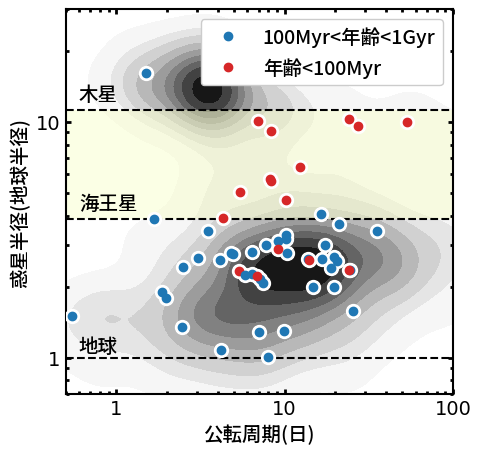

In [13]:
import seaborn as sb
import numpy as np
import matplotlib.pyplot as pl
import matplotlib.ticker as mticker
from matplotlib.ticker import FormatStrFormatter
from collections import OrderedDict
from matplotlib.patches import Rectangle
import matplotlib.font_manager as fm
pl.rcParams['font.size'] = 14

font_path = '/usr/share/fonts/Noto_Sans_JP/static/NotoSansJP-Medium.ttf'  # Replace with the actual path to the font file
font_prop = fm.FontProperties(fname=font_path)

x = 'pl_orbper'
y = 'pl_rade'
idx = np.ones_like(df[x])

porb_lims = (0.5,100)
rp_lims = (0.7,30)

# figsize=None
figsize=(5,5)
fig, ax = pl.subplots(figsize=figsize)

###NExSci
_ = sb.kdeplot(data=df, 
               x=x, 
               y=y,  
               cmap='gray_r', 
               # n_levels=8, 
               log_scale=True, 
               fill=True, 
               ax=ax, 
               zorder=-1
              )
###planets
#periods = planets['Planet period'].str.split(r'±|\+|-', expand=True)[0].astype(float)
periods = planets_nexsci['pl_orbper']
#radii = planets['Planet radius'].str.split(r'±|\+|-', expand=True)[0].astype(float)
radii = planets_nexsci['pl_rade']
#names = planets.Host.str.lower().replace(' ', '').tolist()
names = planets_nexsci['hostname']

for xx,yy,n in zip(periods, radii, names):
    idx = hostnames==n
    d = hosts[idx].squeeze()
    if len(d)>0:
        age = float(d.Age.split('-')[1])
        if age<100:
            # print(n,xx,yy)
            color = 'C3'
            # lbl = '年齢<1億歳'
            lbl = '年齢<100Myr'
        else:
            # print(n, xx, yy)
            color = 'C0'
            # lbl = '1億歳<年齢<10億歳'
            lbl = '100Myr<年齢<1Gyr'
        ax.plot(xx, yy, 'o', label=lbl, c=color, zorder=11)
    #     #white outline
        ax.plot(xx, yy, 'o', c='w', label='_nolegend_', ms=10, zorder=10)
    # else:
    #     print(xx,yy,n)
    
###axes
ax.set_xlim(*porb_lims)
ax.set_ylim(*rp_lims)
ax.set_ylabel('惑星半径(地球半径)', fontproperties=font_prop)
ax.set_xlabel('公転周期(日)', fontproperties=font_prop)
ax.tick_params(direction='in', which='both', width=2, bottom=True, top=True, left=True, right=True)
lw=1.5
ax.spines['left'].set_linewidth(lw)
ax.spines['right'].set_linewidth(lw)
ax.spines['top'].set_linewidth(lw)
ax.spines['bottom'].set_linewidth(lw)
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

# Neptune desert
# xs = np.linspace(0.5, 14, 100)
# ax.plot(xs, upper_boundary(xs),'k--',lw=2,zorder=1,alpha=0.5)
# ax.plot(xs, lower_boundary(xs),'k--',lw=2,zorder=1,alpha=0.5)

### labels
dx = 0.6
alpha = 1
Rearth = 1
ax.axhline(Rearth, 0, 1, c='k', ls='--', alpha=alpha, zorder=9)
ax.text(dx, Rearth+0.05, '地球', alpha=alpha, fontproperties=font_prop)
Rnep = 3.88
ax.axhline(Rnep, 0, 1, c='k', ls='--', alpha=alpha, zorder=9)
ax.text(dx, Rnep+0.4, '海王星', alpha=alpha, fontproperties=font_prop)
Rjup = 11.2
ax.axhline(Rjup, 0, 1, c='k', ls='--', alpha=alpha, zorder=9)
ax.text(dx, Rjup+1.1, '木星', alpha=alpha, fontproperties=font_prop)
### legend
handles, labels = pl.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
pl.legend(by_label.values(), 
          list(by_label.keys()), 
          fontsize=10,
          framealpha=1,
          # bbox_to_anchor=(1.0, 1.0), 
          prop=font_prop
         )
# highlight
# rec = Rectangle(xy=(1e-2, 1e-3), width=1e-1, height=1e-2, color='k', fc='none', hatch="X")
# ax.add_patch(rec)
# ax.fill_between(x=porb_lims,y1=Rnep,y2=Rjup, alpha=0.5,
#                 facecolor="none", hatch="X", edgecolor="y", linewidth=0.0)
ax.fill_between(x=porb_lims,y1=Rnep,y2=Rjup, alpha=0.5, zorder=1,
                facecolor="#f9ffcc", edgecolor="#f9ffcc", linewidth=0.0)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

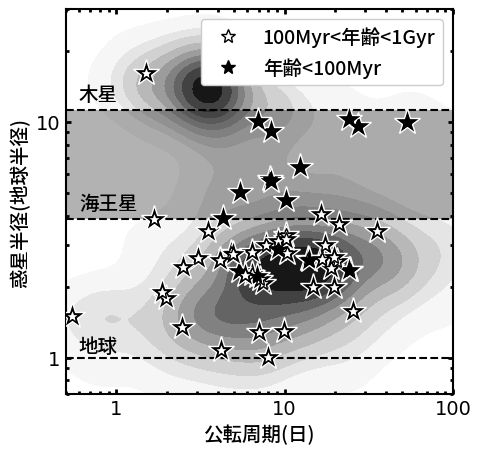

In [94]:
import seaborn as sb
import numpy as np
import matplotlib.pyplot as pl
import matplotlib.ticker as mticker
from matplotlib.ticker import FormatStrFormatter
from collections import OrderedDict
from matplotlib.patches import Rectangle
import matplotlib.font_manager as fm
pl.rcParams['font.size'] = 14

font_path = '/usr/share/fonts/Noto_Sans_JP/static/NotoSansJP-Medium.ttf'  # Replace with the actual path to the font file
font_prop = fm.FontProperties(fname=font_path)

x = 'pl_orbper'
y = 'pl_rade'
idx = np.ones_like(df[x])

porb_lims = (0.5,100)
rp_lims = (0.7,30)

# figsize=None
figsize=(5,5)
fig, ax = pl.subplots(figsize=figsize)

###NExSci
_ = sb.kdeplot(data=df, 
               x=x, 
               y=y,  
               cmap='gray_r', 
               # n_levels=8, 
               log_scale=True, 
               fill=True, 
               ax=ax, 
               zorder=-1
              )
###planets
#periods = planets['Planet period'].str.split(r'±|\+|-', expand=True)[0].astype(float)
periods = planets_nexsci['pl_orbper']
#radii = planets['Planet radius'].str.split(r'±|\+|-', expand=True)[0].astype(float)
radii = planets_nexsci['pl_rade']
#names = planets.Host.str.lower().replace(' ', '').tolist()
names = planets_nexsci['hostname']

for xx,yy,n in zip(periods, radii, names):
    idx = hostnames==n
    d = hosts[idx].squeeze()
    if len(d)>0:
        age = float(d.Age.split('-')[1])
        if age<100:
            # print(n,xx,yy)
            color = 'k'
            # lbl = '年齢<1億歳'
            lbl = '年齢<100Myr'
        else:
            # print(n, xx, yy)
            color = 'w'
            # lbl = '1億歳<年齢<10億歳'
            lbl = '100Myr<年齢<1Gyr'
        ax.plot(xx, yy, '*', label=lbl, c=color, mec='k', ms=10, zorder=11)
    #     #white outline
        ax.plot(xx, yy, '*', label='_nolegend_', c='k', mec='w', ms=20, zorder=10)
    # else:
    #     print(xx,yy,n)
    
###axes
ax.set_xlim(*porb_lims)
ax.set_ylim(*rp_lims)
ax.set_ylabel('惑星半径(地球半径)', fontproperties=font_prop)
ax.set_xlabel('公転周期(日)', fontproperties=font_prop)
ax.tick_params(direction='in', which='both', width=2, bottom=True, top=True, left=True, right=True)
lw=1.5
ax.spines['left'].set_linewidth(lw)
ax.spines['right'].set_linewidth(lw)
ax.spines['top'].set_linewidth(lw)
ax.spines['bottom'].set_linewidth(lw)
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

# Neptune desert
# xs = np.linspace(0.5, 14, 100)
# ax.plot(xs, upper_boundary(xs),'k--',lw=2,zorder=1,alpha=0.5)
# ax.plot(xs, lower_boundary(xs),'k--',lw=2,zorder=1,alpha=0.5)

### labels
dx = 0.6
alpha = 1
Rearth = 1
ax.axhline(Rearth, 0, 1, c='k', ls='--', alpha=alpha, zorder=9)
ax.text(dx, Rearth+0.05, '地球', alpha=alpha, fontproperties=font_prop)
Rnep = 3.88
ax.axhline(Rnep, 0, 1, c='k', ls='--', alpha=alpha, zorder=9)
ax.text(dx, Rnep+0.4, '海王星', alpha=alpha, fontproperties=font_prop)
Rjup = 11.2
ax.axhline(Rjup, 0, 1, c='k', ls='--', alpha=alpha, zorder=9)
ax.text(dx, Rjup+1.1, '木星', alpha=alpha, fontproperties=font_prop)
### legend
handles, labels = pl.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
pl.legend(by_label.values(), 
          list(by_label.keys()), 
          fontsize=10,
          framealpha=1,
          # bbox_to_anchor=(1.0, 1.0), 
          prop=font_prop
         )
# highlight
# rec = Rectangle(xy=(1e-2, 1e-3), width=1e-1, height=1e-2, color='k', fc='none', hatch="X")
# ax.add_patch(rec)
# ax.fill_between(x=porb_lims,y1=Rnep,y2=Rjup, alpha=0.5,
#                 facecolor="none", hatch="X", edgecolor="y", linewidth=0.0)
ax.fill_between(x=porb_lims,y1=Rnep,y2=Rjup, alpha=0.3, zorder=1,
                facecolor="k", edgecolor="w", linewidth=0.0)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))